# Model Training

## Linear Regression: Publisher, Platform_creator, and genre predictors

##### Required Packages

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



### Linear regression preprocessing

In [22]:
data = pd.read_csv('../Data/preprocessed_vgsales.csv')

### Encoding and selecting features

In [23]:
X = data[['Platform_Creator', 'Publisher', 'Genre']]
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
# Getting the encoded feature names
encoded_feature_names = encoder.get_feature_names_out(['Platform_Creator', 'Publisher', 'Genre'])
# Converting the sparse matrix to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names)
y = data['Global_Sales']

### Splitting the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

## Fit the model

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model 

In [26]:
# Making predictions
y_pred = model.predict(X_test)


# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.0100312713215767e+23
R² Score: -2.361007212445024e+22


# Residual Plot

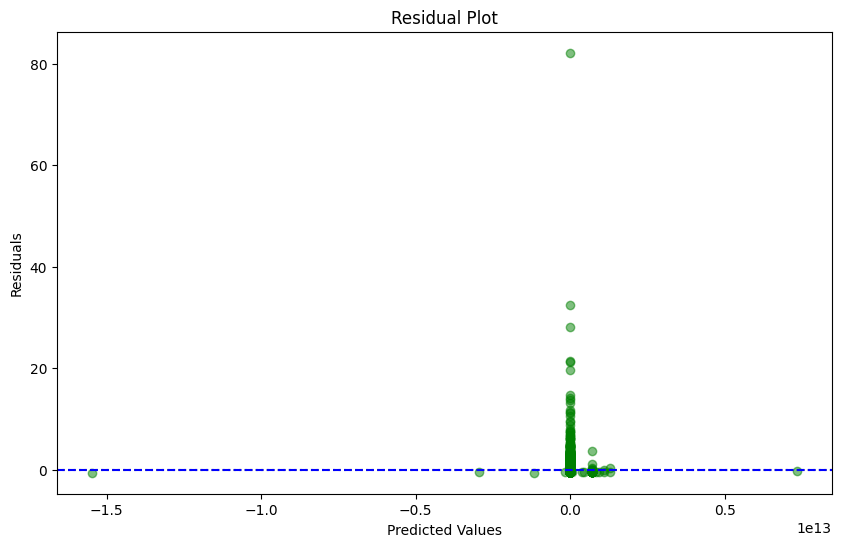

In [27]:
residuals = y_test - y_pred 
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color="g", 
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2})

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()
